# Pandas: Series

La librería Pandas ofrece clases que permiten manejar datasets para operaciones de análisis de datos.
Para importar la librería en un programa se usa:

In [17]:
import pandas as pd

Pandas es una librería orientada a objetos y los objetos más importantes que incluye son las Series y los DataFrames.

## Series
Una serie es una colección de valores con un índice asociado. El índice puede ser numérico, nominal, fecha y hora, etc. y permite referenciar los datos de la serie por su índice.
Los siguientes son algunos ejemplos de creación de objetos Serie

In [18]:
# Crear una seríe indicando la producción por mes
produccion = pd.Series( [120,130,110,150,170,180,170,160,190,175,160,141], 
                       index=['ene','feb','mar','abr','may','jun','jul','ago','sep','oct','nov','dec']  )
print(produccion)

ene    120
feb    130
mar    110
abr    150
may    170
jun    180
jul    170
ago    160
sep    190
oct    175
nov    160
dec    141
dtype: int64


In [19]:
# Crear una serie a partir de un diccionario
dict = { 'a':6.4, 'b':7.1, 'c':8.8, 'd':9.2, 'e':6.4, 'f':5.6, 'g':3.2 }
pesos = pd.Series(dict)
print(pesos)

a    6.4
b    7.1
c    8.8
d    9.2
e    6.4
f    5.6
g    3.2
dtype: float64


In [20]:
# Crear una serie utilizando un secuencia aleatoria distribuida normalmente
# Si no se indican los indices, se numeran automáticamente al instanciar la serie
import numpy as np
aleatorio = pd.Series( np.random.randn(10) )
print(aleatorio)

0   -1.310828
1    0.113184
2   -0.151351
3    0.301570
4    0.051979
5    0.135917
6   -1.346176
7   -0.269922
8   -0.874482
9    0.870266
dtype: float64


### Atributos y Métodos de las Series
Los siguientes son los atributos más importantes

In [21]:
# Número de elementos
pesos.size

7

In [22]:
# Forma (número de filas, columnas). En el caso de las series solo son filas
pesos.shape

(7,)

In [23]:
# Tipo de datos que contiene la serie
pesos.dtype

dtype('float64')

In [24]:
# Los indices de la serie
pesos.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')

In [25]:
# Los valores contenidos en la serie
pesos.values

array([ 6.4,  7.1,  8.8,  9.2,  6.4,  5.6,  3.2])

In [26]:
## Acceso a los elementos de la serie

Los elementos de una serie se acceden de forma similar a los de una lista. Se pueden usar los índices de la serie, o la posición de los elementos, por ejemplo:

In [27]:
pesos['a']

6.4000000000000004

In [28]:
# o usando el metodo .get
pesos.get('a')

6.4000000000000004

In [29]:
pesos[0]

6.4000000000000004

In [30]:
pesos['b':'e']

b    7.1
c    8.8
d    9.2
e    6.4
dtype: float64

In [31]:
pesos[1:5]

b    7.1
c    8.8
d    9.2
e    6.4
dtype: float64

In [32]:
pesos[:'c']

a    6.4
b    7.1
c    8.8
dtype: float64

In [33]:
pesos[:3]

a    6.4
b    7.1
c    8.8
dtype: float64

In [34]:
pesos['d':]

d    9.2
e    6.4
f    5.6
g    3.2
dtype: float64

In [35]:
pesos[3:]

d    9.2
e    6.4
f    5.6
g    3.2
dtype: float64

También se puede seleccionar un subconjunto de índices o posiciones particular

In [36]:
pesos[ ['b','e','c'] ]

b    7.1
e    6.4
c    8.8
dtype: float64

In [37]:
pesos[ [1,4,2] ]

b    7.1
e    6.4
c    8.8
dtype: float64

## Indexado lógico

La indexación lógica permite obtener los elementos de la serie que cumplen con una condición lógica

In [38]:
pesos[ pesos>7 ]

b    7.1
c    8.8
d    9.2
dtype: float64

Se puede comprobar si un determinado indice está presente en la serie

In [39]:
'a' in pesos

True

In [40]:
'h' in pesos

False

In [41]:
'Sep' in produccion

False

In [42]:
# Asignar valor a un indice
pesos.at['a'] = 5.0
pesos[0]

5.0

In [43]:
# Esta vacia la serie
pesos.empty

False

In [44]:
# Crear una serie vacia
volumenes = pd.Series()
volumenes.empty

True

## Eliminar elementos de una Series

Se pueden eliminar elementos por medio del método .drop e indicando los índices a eliminar

In [45]:
pesos.drop(['e','c'])

a    5.0
b    7.1
d    9.2
f    5.6
g    3.2
dtype: float64

De particular interes son casos en los que la serie contiene elementos nulos (NaN). Todos los elementos nulos se pueden eliminar con el método .dropna

In [46]:
# Hacer una copia de la Series
pesos2 = pesos.copy()
# Hacer nulos algunos de sus elementos
pesos2.at['b'] = None
pesos2

a    5.0
b    NaN
c    8.8
d    9.2
e    6.4
f    5.6
g    3.2
dtype: float64

In [47]:
pesos2.dropna()

a    5.0
c    8.8
d    9.2
e    6.4
f    5.6
g    3.2
dtype: float64

## Métodos para comprobar una condición lógica sobre todos los elementos de una Series

In [48]:
# Comprobar si todos/algunos elementos de la serie cumplen una condición lógica
(pesos>5).all()

False

In [49]:
(pesos<5).any()

True

In [50]:
# Indice correspondiente al mayor/menor valor de la serie
pesos.argmax()

'd'

In [51]:
pesos.argmin()

'g'

In [52]:
# Convertir a matriz de numpy
x = pesos.as_matrix()
print(x)
print(type(x))

[ 5.   7.1  8.8  9.2  6.4  5.6  3.2]
<class 'numpy.ndarray'>


In [53]:
# Estadísticas descriptivas de la serie
pesos.describe()

count    7.000000
mean     6.471429
std      2.117163
min      3.200000
25%      5.300000
50%      6.400000
75%      7.950000
max      9.200000
dtype: float64

In [54]:
# Seleccionar un rango de elementos al principio/final de la serie
print( pesos.head(3) )
print( pesos.tail(2) )

a    5.0
b    7.1
c    8.8
dtype: float64
f    5.6
g    3.2
dtype: float64


## Operadores aritméticos

Todas las operaciones aritméticas entre series se hacen alineando los indices de las series. Las operaciones se pueden realizar utilizando los métodos .add .sub .mul .div .pow .dot .abs .mod o los correspondientes operadores sobrecargados. Indices no presentes se asumen NaN (Not a Number)

In [55]:
# Crear una nueva serie
medidas = pd.Series({ 'b':6.1, 'c':8.2, 'd':7.3, 'e':5.4, 'f':6.5, 'h':3.2 })
print("pesos\n", pesos)
print("\nmedidas\n",medidas)

pesos
 a    5.0
b    7.1
c    8.8
d    9.2
e    6.4
f    5.6
g    3.2
dtype: float64

medidas
 b    6.1
c    8.2
d    7.3
e    5.4
f    6.5
h    3.2
dtype: float64


In [56]:
pesos.add(medidas)

a     NaN
b    13.2
c    17.0
d    16.5
e    11.8
f    12.1
g     NaN
h     NaN
dtype: float64

In [57]:
pesos+medidas

a     NaN
b    13.2
c    17.0
d    16.5
e    11.8
f    12.1
g     NaN
h     NaN
dtype: float64

In [58]:
pesos-medidas

a    NaN
b    1.0
c    0.6
d    1.9
e    1.0
f   -0.9
g    NaN
h    NaN
dtype: float64

In [59]:
pesos*medidas

a      NaN
b    43.31
c    72.16
d    67.16
e    34.56
f    36.40
g      NaN
h      NaN
dtype: float64

In [60]:
pesos/medidas

a         NaN
b    1.163934
c    1.073171
d    1.260274
e    1.185185
f    0.861538
g         NaN
h         NaN
dtype: float64

## Operadores relacionales

Se cuenta asi mismo con los métodos relacionales estándar .lt .le .gt .ge .eq .ne o sus correspondientes operadores sobrecargados < <= > >= == !=. Solo son aplicables a series de igual longitud (no es oblogatorio que coincidan los índices).

In [61]:
medidas.at['a']=1.
pesos.size, medidas.size

(7, 7)

In [62]:
pesos<medidas

a     True
b     True
c    False
d    False
e     True
f    False
g    False
dtype: bool

In [63]:
pesos.eq(medidas)

a    False
b    False
c    False
d    False
e    False
f    False
g    False
dtype: bool

In [64]:
pesos!=medidas

a    True
b    True
c    True
d    True
e    True
f    True
g    True
dtype: bool

In [65]:
pesos.ge(medidas)

a    False
b    False
c     True
d     True
e    False
f     True
g     True
dtype: bool

In [66]:
# Comprobar si alguno de los elementos es nulo
pesos.isnull()

a    False
b    False
c    False
d    False
e    False
f    False
g    False
dtype: bool

También se cuenta con las operaciones estádisticas comunes: .count .sum .min .max .mean .var .std .median .mode .cov .corr .autocorr .sem

In [67]:
pesos.count(), pesos.sum(), pesos.mean(), pesos.median()

(7, 45.300000000000004, 6.4714285714285724, 6.4)

Se puede ordernar la serie por valores o por indices, en orden creciente o decreciente

In [68]:
pesos.sort_values()

g    3.2
a    5.0
f    5.6
e    6.4
b    7.1
c    8.8
d    9.2
dtype: float64

In [69]:
pesos.sort_index(ascending=False)

g    3.2
f    5.6
e    6.4
d    9.2
c    8.8
b    7.1
a    5.0
dtype: float64

## Operaciones de entrada/salida

In [70]:
# Salvar la serie en un archivo
pesos.to_csv('pesos.csv')

# Leer la serie de un archivo
copia = pd.read_csv('pesos.csv', squeeze=True, index_col=0, header=None)

copia

0
a    5.0
b    7.1
c    8.8
d    9.2
e    6.4
f    5.6
g    3.2
Name: 1, dtype: float64

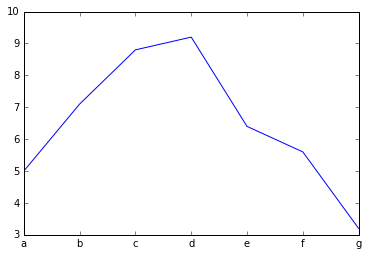

In [71]:
# Graficar la serie
import matplotlib.pyplot as plt
pesos.plot()
plt.show()

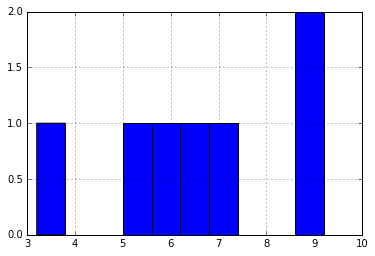

In [72]:
# Obtener su histograma
pesos.hist()
plt.show()

## Referencias

Series
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html
